In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [29]:
iris=load_iris()
iris.keys()
df=pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)], axis=1)
iris.feature_names.append('Species')
df.columns=iris.feature_names

In [40]:
df.groupby('Species')['Species'].count()


Species
0    50
1    50
2    50
Name: Species, dtype: int64

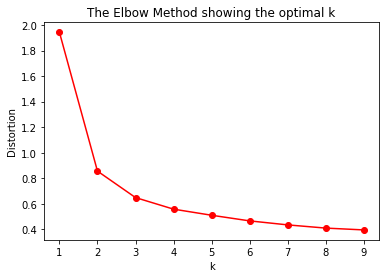

In [44]:
X=df.iloc[:,:-1]
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'ro-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [98]:
kmeans=KMeans(n_clusters=5,random_state=0)

In [99]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [100]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = kmeans.labels_

In [101]:
cluster_map.groupby('cluster')['cluster'].count()

cluster
0    50
1    24
2    28
3    12
4    36
Name: cluster, dtype: int64

In [102]:
kmeans.inertia_ 

46.561630158730161

In [2]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6808136202713507
For n_clusters=3, The Silhouette Coefficient is 0.5525919445213676
For n_clusters=4, The Silhouette Coefficient is 0.49782569007544936
For n_clusters=5, The Silhouette Coefficient is 0.48966691104515186
For n_clusters=6, The Silhouette Coefficient is 0.3664105967273106
For n_clusters=7, The Silhouette Coefficient is 0.35302348335769373
For n_clusters=8, The Silhouette Coefficient is 0.3631199945246835
For n_clusters=9, The Silhouette Coefficient is 0.33022650419678456
For n_clusters=10, The Silhouette Coefficient is 0.3388826197785886
